# Genocide in Gaza: Telling the Story through Data Science!

In [114]:
# Uncomment and Install the below packages, if not yet done.
# ! pip install pdfplumber
# ! pip install arabic_reshaper
# ! pip install python-bidi

In [115]:
# Run this cell to set up the notebook.
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
np.set_printoptions(legacy='1.13')

import warnings
warnings.simplefilter('ignore')

## 1. Preprocessing 

### 1.A Converting the PDF list in the "killed-in-gaza_moh_2024-09-21.pdf" file to CSV.



In [118]:
import pdfplumber
import csv
import arabic_reshaper
from bidi.algorithm import get_display

*Note: Run the below cell only once for the first time, it might take some time to create the CSV file

In [121]:
base_dataset_dir = "datasets/"

In [9]:
def fix_arabic(text):
    if text:
        #v1
        # reshaped_text = arabic_reshaper.reshape(text)
        # return get_display(reshaped_text);
        # v2
        # reshaped_text = get_display(text)
        # arabic_text = arabic_reshaper.reshape(reshaped_text)
        # return arabic_text;
        return get_display(text);
    return text

with pdfplumber.open(base_dataset_dir+"killed-in-gaza_moh_2025-03-23.pdf") as pdf:
    with open(base_dataset_dir+"killed-in-gaza_moh_2025-03-23.csv", "w", newline="", encoding='utf-8-sig') as f:
        writer = csv.writer(f)
        for page in pdf.pages:
            table = page.extract_table()
            if table:
                for row in table:
                    # Fix only the Arabic column (column index 2)
                    fixed_row = [];
                    for i, cell in enumerate(row):
                        if i == 2:
                            fixed_row.append(fix_arabic(cell))
                        else:
                            fixed_row.append(cell)
                    writer.writerow(fixed_row);

CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, def

In [123]:
killed_in_gaza = Table.read_table(base_dataset_dir+'killed-in-gaza_moh_2025-03-23.csv')
killed_in_gaza.show(5)

### 1.B Converting the JSON list in the "infrastructure-damaged.json" file to CSV.

In [126]:
import json
import csv
with open(base_dataset_dir+"infrastructure-damaged_2025-04-12.json", "r") as f:
    data = json.load(f)
    with open(base_dataset_dir+"infrastructure-damaged.csv", "w", newline="") as f:
        writer = csv.writer(f)
        writer.writerow(data[0].keys())
        for item in data:
            writer.writerow(item.values())
    print("CSV file created successfully.")


CSV file created successfully.


In [127]:
import csv
import json

input_csv_file = base_dataset_dir+"infrastructure-damaged.csv"
output_csv_file = base_dataset_dir+"infrastructure-damaged_fixed.csv"

def fix_data(input_file, output_file):
    with open(base_dataset_dir+"infrastructure-damaged_2025-04-12.json", "r") as f:
        data = json.load(f)

    all_keys = {
        "report_date",
        "civic_buildings",
        "educational_buildings",
        "places_of_worship",
        "residential",
    }

    civic_keys = {"destroyed", "ext_destroyed"}
    educational_keys = {"destroyed", "ext_destroyed", "damaged", "ext_damaged"}
    worship_keys = {
        "mosques_destroyed",
        "ext_mosques_destroyed",
        "mosques_damaged",
        "ext_mosques_damaged",
        "churches_destroyed",
        "ext_churches_destroyed",
    }
    residential_keys = {"destroyed", "ext_destroyed", "damaged", "ext_damaged"}

    with open(output_file, "w", newline="") as f:
        writer = csv.writer(f)

        header = [
            "report_date",
            "civic_destroyed",
            "civic_ext_destroyed",
            "edu_destroyed",
            "edu_ext_destroyed",
            "edu_damaged",
            "edu_ext_damaged",
            "worship_mosques_destroyed",
            "worship_ext_mosques_destroyed",
            "worship_mosques_damaged",
            "worship_ext_mosques_damaged",
            "worship_churches_destroyed",
            "worship_ext_churches_destroyed",
            "residential_destroyed",
            "residential_ext_destroyed",
            "residential_damaged",
            "residential_ext_damaged",
        ]
        writer.writerow(header)

        # Process each item in the JSON data
        for item in data:
            report_date = item.get("report_date", "")

            civic = item.get("civic_buildings", {})
            civic_destroyed = civic.get("destroyed", 0)
            civic_ext_destroyed = civic.get("ext_destroyed", 0)

            edu = item.get("educational_buildings", {})
            edu_destroyed = edu.get("destroyed", 0)
            edu_ext_destroyed = edu.get("ext_destroyed", 0)
            edu_damaged = edu.get("damaged", 0)
            edu_ext_damaged = edu.get("ext_damaged", 0)

            worship = item.get("places_of_worship", {})
            worship_mosques_destroyed = worship.get("mosques_destroyed", 0)
            worship_ext_mosques_destroyed = worship.get("ext_mosques_destroyed", 0)
            worship_mosques_damaged = worship.get("mosques_damaged", 0)
            worship_ext_mosques_damaged = worship.get("ext_mosques_damaged", 0)
            worship_churches_destroyed = worship.get("churches_destroyed", 0)
            worship_ext_churches_destroyed = worship.get("ext_churches_destroyed", 0)

            residential = item.get("residential", {})
            residential_destroyed = residential.get("destroyed", 0)
            residential_ext_destroyed = residential.get("ext_destroyed", 0)
            residential_damaged = residential.get("damaged", 0)
            residential_ext_damaged = residential.get("ext_damaged", 0)

            row = [
                report_date,
                civic_destroyed,
                civic_ext_destroyed,
                edu_destroyed,
                edu_ext_destroyed,
                edu_damaged,
                edu_ext_damaged,
                worship_mosques_destroyed,
                worship_ext_mosques_destroyed,
                worship_mosques_damaged,
                worship_ext_mosques_damaged,
                worship_churches_destroyed,
                worship_ext_churches_destroyed,
                residential_destroyed,
                residential_ext_destroyed,
                residential_damaged,
                residential_ext_damaged,
            ]
            writer.writerow(row)

    print(f"CSV file '{output_file}' created successfully.")


fix_data(input_csv_file, output_csv_file)

CSV file 'datasets/infrastructure-damaged_fixed.csv' created successfully.


In [128]:
infrastructure = Table.read_table(base_dataset_dir+'infrastructure-damaged_fixed.csv')
infrastructure.show(5)

## 2. Exploratory Analysis & Visualization 

In [133]:
# Daily casualities in Gaza
gaza_casualties = Table.read_table(base_dataset_dir+'casualties_daily_gaza_2025-04-12.csv')
gaza_casualties.show(5);

In [138]:
# Daily casualities in West Bank
westbank_casualties = Table.read_table(base_dataset_dir+'casualties_daily_west_bank_2025-04-12.csv')
westbank_casualties.show(5);

### Plotting some raw data

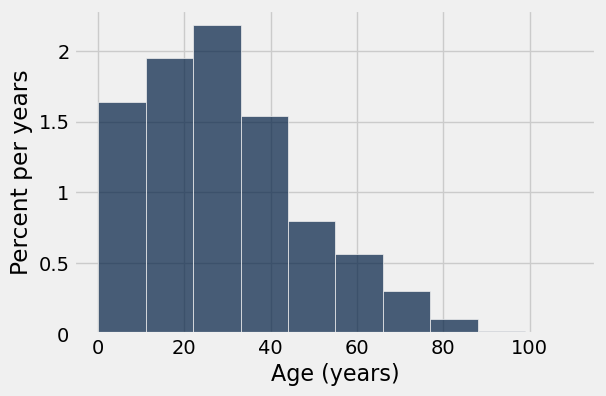

In [141]:
# 1) Age Distribution of Victims in Gaza
killed_in_gaza.hist('Age', unit="years")
plt.show();

In [143]:
gaza_casualties.show(3)

In [145]:
infrastructure.show(5)

# For Daily Casualty In Gaza

In [148]:
# Function to extract the month and year of the report date, so that we could group them by months
def extract_month_and_year_from_date(date):
    return date[:7];

# Array of extracted year and month
year_and_month = gaza_casualties.apply(extract_month_and_year_from_date, 'report_date');

gaza_with_months = gaza_casualties.select('report_date','ext_killed').with_column("year-month", year_and_month)
gaza_with_months.show(5)

In [150]:
monthly_killed = gaza_with_months.group('year-month', np.sum).drop('report_date sum')
monthly_killed.show(19)

In [152]:
# Keep only rows where report_date is not "2025-04"
# monthly_killed = monthly_killed.where("year-month", are.not_equal_to("2025-04")); #Drop this row because the 
# monthly_killed.show(18)


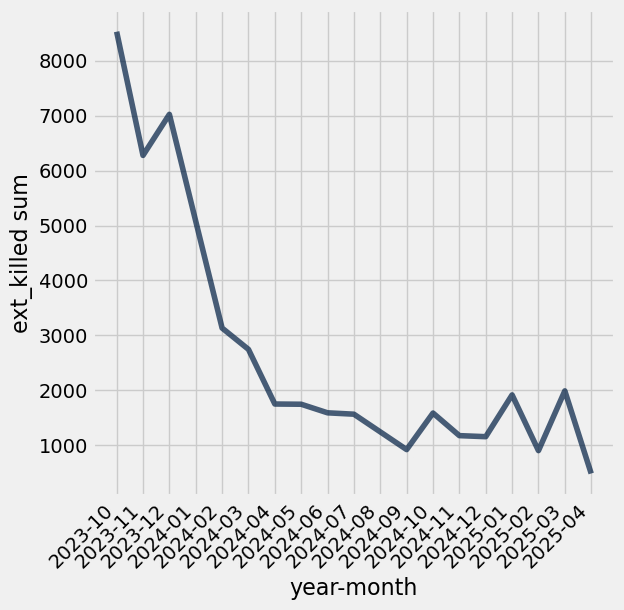

In [154]:
monthly_killed.plot('year-month','ext_killed sum')
plt.xticks(rotation=45, ha='right')  # Rotate 45 degrees and align right
plt.show();


# For infrastructure 

In [157]:
# Array of extracted year and month
# We will only deal with the extrapolated data
year_and_month = infrastructure.apply(extract_month_and_year_from_date, 'report_date');

infrastructure_with_months = infrastructure.select('report_date','residential_ext_destroyed').with_column("year-month", year_and_month)
infrastructure_with_months.show(5)

In [159]:
monthly_destroyed = infrastructure_with_months.group('year-month', np.max).drop('report_date max')  #We take the max because its cummalative
monthly_destroyed.show(5);

In [161]:
# Step 1: Get the column of cumulative values
cumulative_res = monthly_destroyed.column('residential_ext_destroyed max')


# Step 2: Create a list for monthly values
monthly_res = [cumulative_res[0]]  # The first month's value is the same as cumulative


# Step 3: Loop through the rest and compute monthly differences
for i in range(1, len(cumulative_res)):
    monthly_value_res = cumulative_res[i] - cumulative_res[i - 1]
    monthly_res.append(monthly_value_res)


# Step 4: Add the monthly values as a new column
monthly_destroyed = monthly_destroyed.with_column('Residential Destroyed', monthly_res).drop(1)


# Step 5: Preview the result
monthly_destroyed.show(18)


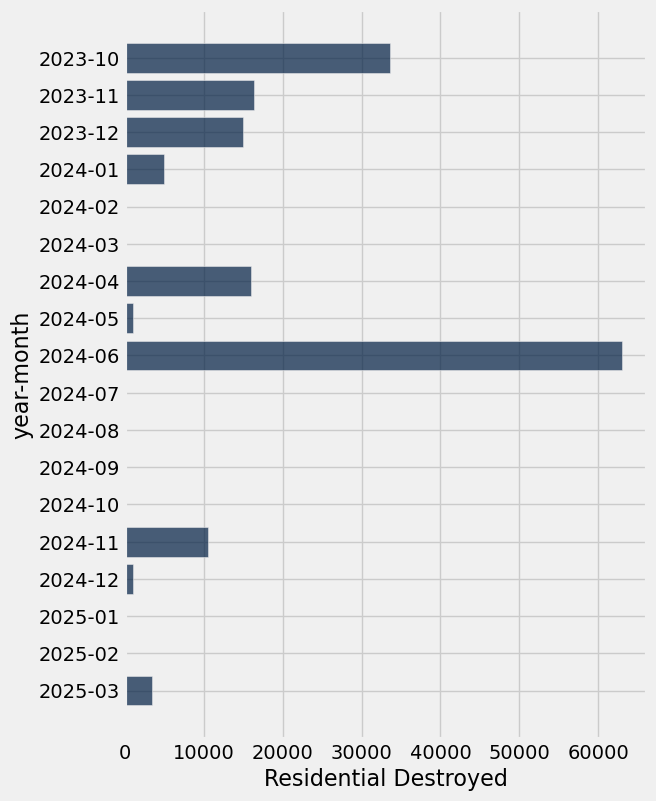

In [163]:
monthly_destroyed.barh('year-month','Residential Destroyed')
plt.show();

In [165]:
# Join the tables on 'year-month'
combined = monthly_destroyed.join('year-month', monthly_killed, 'year-month')

# Preview the merged table
combined.show()

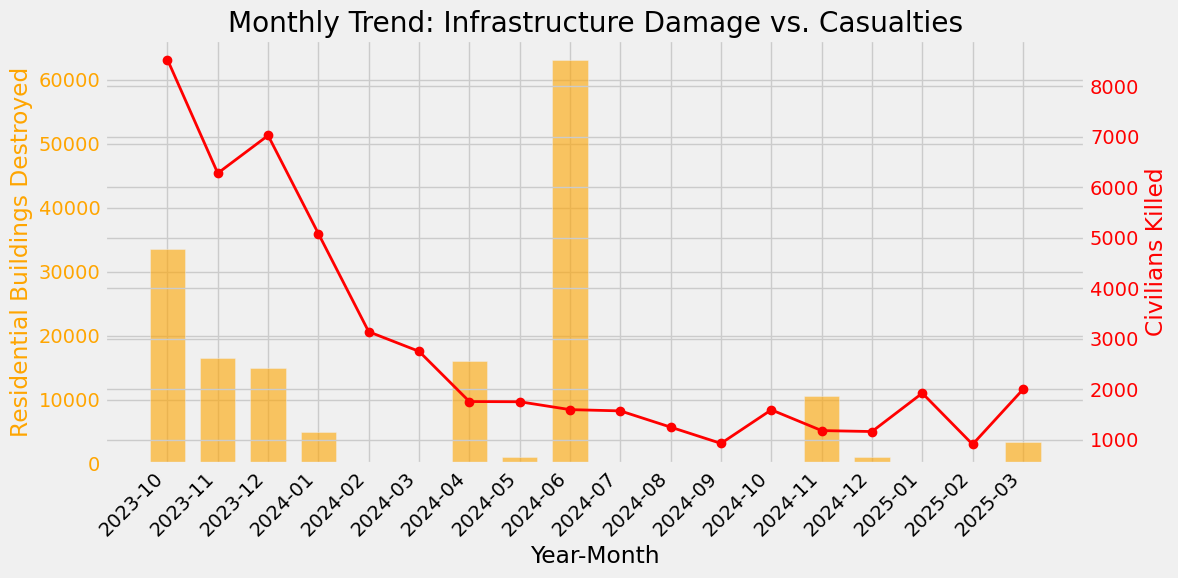

In [167]:
# Extract data from the joined table
months = combined.column('year-month')
destroyed = combined.column('Residential Destroyed')
killed = combined.column('ext_killed sum')

# Initialize figure and primary axis (for bars)
fig, ax1 = plt.subplots(figsize=(12, 6))

# Bar chart (Infrastructure Damage - Left Y-axis)
ax1.bar(months, destroyed, color='orange', alpha=0.6, 
        label='Residential Destroyed', width=0.7)
ax1.set_xlabel('Year-Month')
ax1.set_ylabel('Residential Buildings Destroyed', color='orange')
ax1.tick_params(axis='y', labelcolor='orange')
ax1.set_xticklabels(months, rotation=45, ha='right')

# Line graph (Casualties - Right Y-axis)
ax2 = ax1.twinx()
ax2.plot(months, killed, color='red', marker='o', 
         linewidth=2, label='Civilians Killed')
ax2.set_ylabel('Civilians Killed', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Customize the chart
plt.title('Monthly Trend: Infrastructure Damage vs. Casualties')
# ax1.legend(loc='upper left')
# ax2.legend(loc='upper right')
plt.tight_layout()  # Prevent label clipping
plt.show()

## Insights gained from the Overlaid Graph


- The overlaid bar and line chart illustrates the correlation between civilian infrastructure damage and casualty rates in Gaza from October 2023 to March 2025. October 2023 is marked with the highest civilian fatalities (around 8,000) and most residential building damage (over 30,000). This pattern of high casualties matching heavy damage persists through the last few months of 2023, reflecting the high-intensity initial phase of the conflict.

- One notable point is the consistent decline in civilian casualties from early 2024 onwards, even as the destruction of buildings continues ocassionally. Notably, February and March 2024 show a sharp drop in both casualties and infrastructure damage, coinciding with a ceasefire during that period. Similarly, early 2025 (January–February) also shows another ceasefire, which explains the absence of heavy damage during these months.

- Most notably, in June 2024, infrastructure destruction rose significantly with no corresponding increase in civilian deaths to accompany it. This is a shift in the nature of attacks—rendered as targeted demolitions rather than high-casualty attacks. 

- Overall, since the initial period suggested high correlation between damage and casualties, the periods that followed suggest that massive destruction of infrastructure can occur independently, most likely due to strategic or political reasons such as ceasefires and changing warfare tactics.


## Hypothesis Testing

In [25]:
killed_in_gaza.show(4);

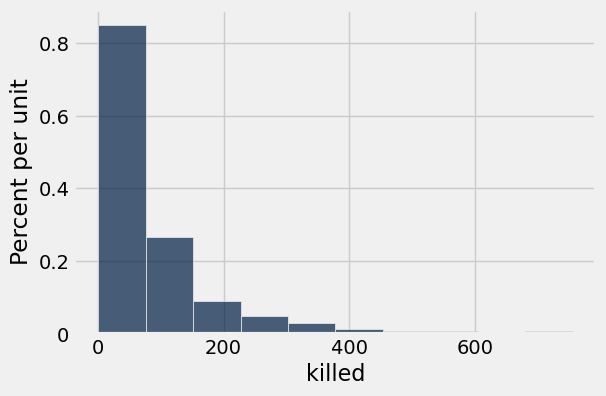

In [47]:
gaza_casualties.hist('killed')
plt.show();

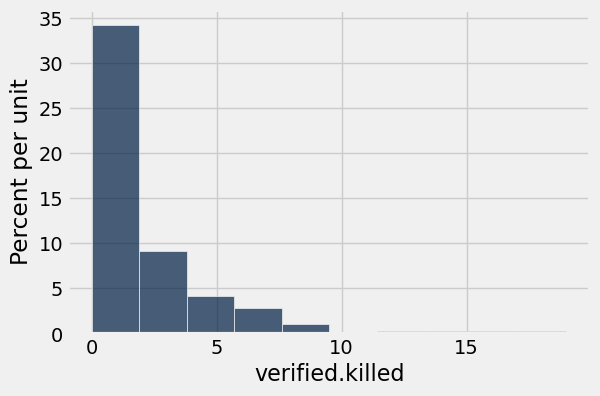

In [51]:
westbank_casualties.hist('verified.killed')
plt.show();

In [82]:
children = killed_in_gaza.where("Sex", 'f').num_rows

In [84]:
allPeople = killed_in_gaza.num_rows

In [86]:
children/allPeople


0.32994802079168334